In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [13]:
df_fraud = pd.read_csv('Fraud_check_Randomforest.csv')
df_fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [14]:
df_fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [15]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [16]:
df_fraud.rename(columns = {'Marital.Status':'Marital_status', 'Taxable.Income':'Taxable_income', 
                                'City.Population':'City_population', 'Work.Experience':'Work_experience'}, inplace = True)

In [17]:
df_fraud

,Undergrad,Marital_status,Taxable_income,City_population,Work_experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# Converting Sales feature into categorical type

In [18]:
taxable_inc = pd.cut(df_fraud.Taxable_income, bins=[0, 30000, 100000], labels=['Risky', 'Good'])

df_fraud.drop(['Taxable_income'], axis=1, inplace=True)
df_fraud.insert(0, 'Taxable_income', taxable_inc)

df_fraud

,Taxable_income,Undergrad,Marital_status,City_population,Work_experience,Urban
0,Good,NO,Single,50047,10,YES
1,Good,YES,Divorced,134075,18,YES
2,Good,NO,Married,160205,30,YES
3,Good,YES,Single,193264,15,YES
4,Good,NO,Married,27533,28,NO
...,...,...,...,...,...,...
595,Good,YES,Divorced,39492,7,YES
596,Good,YES,Divorced,55369,2,YES
597,Good,NO,Divorced,154058,0,YES
598,Good,YES,Married,180083,17,NO


In [19]:
label_en = preprocessing.LabelEncoder()
df_fraud['Undergrad'] = label_en.fit_transform(df_fraud['Undergrad'])

df_fraud.Undergrad

0      0
1      1
2      0
3      1
4      0
      ..
595    1
596    1
597    0
598    1
599    0
Name: Undergrad, Length: 600, dtype: int32

In [20]:
df_fraud['Marital_status'] = label_en.fit_transform(df_fraud['Marital_status'])

df_fraud.Marital_status

0      2
1      0
2      1
3      2
4      1
      ..
595    0
596    0
597    0
598    1
599    0
Name: Marital_status, Length: 600, dtype: int32

In [21]:
df_fraud['Urban'] = label_en.fit_transform(df_fraud['Urban'])

df_fraud.Urban

0      1
1      1
2      1
3      1
4      0
      ..
595    1
596    1
597    1
598    0
599    0
Name: Urban, Length: 600, dtype: int32

In [22]:
df_fraud

,Taxable_income,Undergrad,Marital_status,City_population,Work_experience,Urban
0,Good,0,2,50047,10,1
1,Good,1,0,134075,18,1
2,Good,0,1,160205,30,1
3,Good,1,2,193264,15,1
4,Good,0,1,27533,28,0
...,...,...,...,...,...,...
595,Good,1,0,39492,7,1
596,Good,1,0,55369,2,1
597,Good,0,0,154058,0,1
598,Good,1,1,180083,17,0


Text(0.5, 1.0, 'correlation plot')

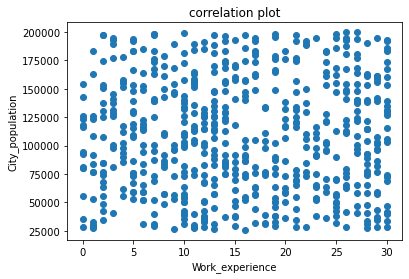

In [31]:
plt.scatter(df_fraud.Work_experience,df_fraud.City_population)
plt.ylabel("City_population")
plt.xlabel("Work_experience")
plt.title("correlation plot")

In [ ]:
# from graph it looks the variables are un-corelated 

Text(0.5, 1.0, 'correlation plot')

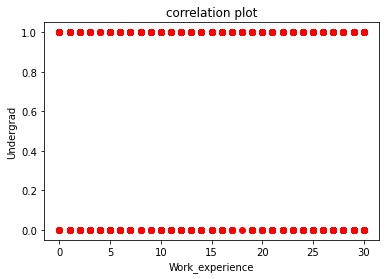

In [35]:
plt.scatter(df_fraud.Work_experience,df_fraud.Undergrad,color="red")
plt.ylabel("Undergrad")
plt.xlabel("Work_experience")
plt.title("correlation plot")

In [34]:
# from graph it looks the variables are un-corelated 

## Outlier detection using 'isolation forest'

In [36]:
from sklearn.ensemble import IsolationForest

In [37]:
df_copy = df_fraud.copy()
data_encoded = pd.get_dummies(df_copy)

### Training the isolation forest model

In [40]:
clf = IsolationForest(random_state=10, contamination=.01)
clf.fit(data_encoded)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.01, random_state=10)

### Predictions

In [41]:
y_pred_outliers = clf.predict(data_encoded)
data_encoded

,Undergrad,Marital_status,City_population,Work_experience,Urban,Taxable_income_Risky,Taxable_income_Good
0,0,2,50047,10,1,0,1
1,1,0,134075,18,1,0,1
2,0,1,160205,30,1,0,1
3,1,2,193264,15,1,0,1
4,0,1,27533,28,0,0,1
...,...,...,...,...,...,...,...
595,1,0,39492,7,1,0,1
596,1,0,55369,2,1,0,1
597,0,0,154058,0,1,0,1
598,1,1,180083,17,0,0,1


In [42]:
data_encoded['scores'] = clf.decision_function(data_encoded)
data_encoded['anomaly'] = clf.predict(data_encoded.iloc[:, 0:7])
data_encoded

,Undergrad,Marital_status,City_population,Work_experience,Urban,Taxable_income_Risky,Taxable_income_Good,scores,anomaly
0,0,2,50047,10,1,0,1,0.128597,1
1,1,0,134075,18,1,0,1,0.131005,1
2,0,1,160205,30,1,0,1,0.084827,1
3,1,2,193264,15,1,0,1,0.104186,1
4,0,1,27533,28,0,0,1,0.097489,1
...,...,...,...,...,...,...,...,...,...
595,1,0,39492,7,1,0,1,0.095277,1
596,1,0,55369,2,1,0,1,0.075817,1
597,0,0,154058,0,1,0,1,0.067130,1
598,1,1,180083,17,0,0,1,0.141565,1


## Print the outlier data points

In [43]:
data_encoded[data_encoded['anomaly']==-1]

,Undergrad,Marital_status,City_population,Work_experience,Urban,Taxable_income_Risky,Taxable_income_Good,scores,anomaly
16,1,0,34551,29,0,1,0,-0.005177,-1
34,1,0,183767,1,1,1,0,-0.016414,-1
126,1,0,195022,3,1,1,0,-0.016731,-1
168,0,0,167629,30,0,1,0,-0.002113,-1
280,0,0,33184,1,0,1,0,-0.022976,-1
541,1,0,191874,30,1,1,0,-0.006491,-1


In [44]:
df_fraud.drop([16, 34, 126, 168, 280, 541], inplace=True)
df_fraud

,Taxable_income,Undergrad,Marital_status,City_population,Work_experience,Urban
0,Good,0,2,50047,10,1
1,Good,1,0,134075,18,1
2,Good,0,1,160205,30,1
3,Good,1,2,193264,15,1
4,Good,0,1,27533,28,0
...,...,...,...,...,...,...
595,Good,1,0,39492,7,1
596,Good,1,0,55369,2,1
597,Good,0,0,154058,0,1
598,Good,1,1,180083,17,0


### Model building (Random Forest)

### Splitting data into feature and class

In [46]:
X = df_fraud.iloc[:,1:]
Y = df_fraud.iloc[:,0]
Y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable_income, Length: 594, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [48]:
X

,Undergrad,Marital_status,City_population,Work_experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [49]:
Y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable_income, Length: 594, dtype: category
Categories (2, object): ['Risky' < 'Good']

## Split the data into train and test dataset

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)

### Model building

In [51]:
num_trees = 100
max_features = 2
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, oob_score=True)
results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

0.7608757062146891


### Accuracy check

In [52]:
model.fit(x_train, y_train)
pred = model.predict(x_train)

accuracy = accuracy_score(y_train, pred)

accuracy

1.0

### Confusion matrix

In [54]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train, pred)
confusion

array([[381,   0],
       [  0,  94]], dtype=int64)

## Prediction on test data

In [55]:
pred_test = model.predict(x_test)
acc_test = accuracy_score(y_test, pred_test)

acc_test

0.7394957983193278

### Plot decision tree in random forest

[Text(0.573796875, 0.96875, 'Work.Experience <= 24.5\ngini = 0.312\nsamples = 295\nvalue = [383, 92]\nclass = Risky'),
 Text(0.19359375, 0.90625, 'Work.Experience <= 1.5\ngini = 0.353\nsamples = 225\nvalue = [276, 82]\nclass = Risky'),
 Text(0.016, 0.84375, 'Urban <= 0.5\ngini = 0.137\nsamples = 15\nvalue = [25, 2]\nclass = Risky'),
 Text(0.008, 0.78125, 'gini = 0.0\nsamples = 6\nvalue = [13, 0]\nclass = Risky'),
 Text(0.024, 0.78125, 'Marital_status <= 1.5\ngini = 0.245\nsamples = 9\nvalue = [12, 2]\nclass = Risky'),
 Text(0.016, 0.71875, 'gini = 0.0\nsamples = 5\nvalue = [8, 0]\nclass = Risky'),
 Text(0.032, 0.71875, 'Work.Experience <= 0.5\ngini = 0.444\nsamples = 4\nvalue = [4, 2]\nclass = Risky'),
 Text(0.024, 0.65625, 'gini = 0.0\nsamples = 2\nvalue = [3, 0]\nclass = Risky'),
 Text(0.04, 0.65625, 'City.Population <= 76754.0\ngini = 0.444\nsamples = 2\nvalue = [1, 2]\nclass = Good'),
 Text(0.032, 0.59375, 'gini = 0.0\nsamples = 1\nvalue = [0, 2]\nclass = Good'),
 Text(0.048, 0.593

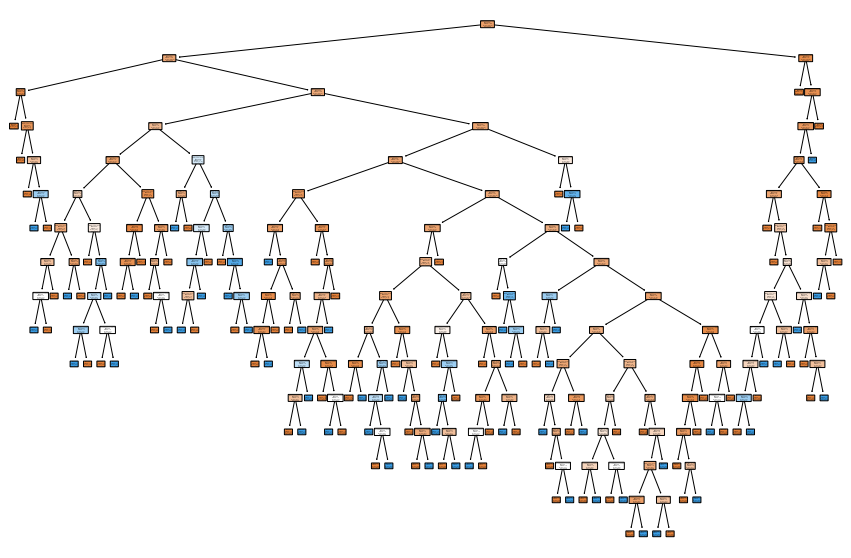

In [57]:
fig = plt.figure(figsize=(15, 10))

fn = [ 'Undergrad', 'Marital_status', 'City.Population',
       'Work.Experience', 'Urban']
cn = ['Risky', 'Good']

plot_tree(model.estimators_[0], 
          feature_names=fn,
          class_names=cn, 
          filled=True, impurity=True, 
          rounded=True)